<a href="https://colab.research.google.com/github/srilakshmi-anbarasan/Gaming-Dataset-Analysis/blob/main/Correlation_Analysis_of_Smart_Contract_Risk_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Correlation Analysis in Smart Contract Security Data

Welcome to the advanced section of our analysis series, where we focus on implementing correlation analysis for binary data using Python. In this notebook, we'll dive into calculating both the Phi coefficient and the Point-Biserial correlation, visualizing the results, and interpreting what these correlations tell us about the relationships between different risk tags in smart contract data.

## Objective
Our goal is to enhance your ability to perform and understand advanced statistical analyses, preparing you for data-driven decision-making in cybersecurity or any field requiring detailed data insight.

Before you begin, ensure you have a basic understanding of Python programming and familiarity with libraries such as pandas, matplotlib, and seaborn. If you're ready, let's start by setting up our environment and loading the data!


### Step 1: Import libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats

# Ensure plots are displayed inline in the notebook
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


### Step 2: Download the dataset

Please note that the dataset that will be downloaded below is a dummy dataset that has been designed for the tutorial. You need to use the actualy dataset provided to you for the analysis

In [ ]:
!gdown 1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n

Downloading...
From: https://drive.google.com/uc?id=1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n
To: /content/webacy_risk_dataset.xlsx
100% 28.2k/28.2k [00:00<00:00, 32.0MB/s]


In [ ]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [3]:
# Loading the dataset
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded file: {filename}')

df = pd.read_excel(filename)

# Display the first five rows of the dataframe
df.head()

Saving data.xlsx to data.xlsx
Uploaded file: data.xlsx


,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


## Calculate Correlation

To calculate the Phi coefficient, which is suitable for pairs of binary variables, we first need to establish a function that can handle this calculation:

In [4]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi

# Loading the dataset
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded file: {filename}')

df = pd.read_excel(filename)

# Example calculation between two risk tags
phi = phi_coefficient(df['hidden_owner'], df['is_airdrop_scam'])
print(f"Phi Coefficient between 'hidden_owner' and 'is_airdrop_scam': {phi}")

Saving data.xlsx to data (1).xlsx
Uploaded file: data (1).xlsx
Phi Coefficient between 'hidden_owner' and 'is_airdrop_scam': 0.3070724672986693


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Phi value close to 0 indicates no correlation between the two columns.

**Note:** Phi values range from -1 to 1. A negative value of Phi indicates that the variables are inversely related, or when one variable increases, the other decreases. On the other hand, positive values indicate that when one variable increases, so does the other.

Let's now define the risk columns of our dataset.

In [5]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now we will calculate the phi coefficient for all the columns

In [6]:
risk_df = df[risk_columns]

# Create a DataFrame to store Phi coefficients
phi_matrix = pd.DataFrame(index=risk_df.columns, columns=risk_df.columns)

# Calculate Phi coefficient for each pair of binary variables
for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])

print("Phi coefficients calculated for all pairs of variables:")
phi_matrix


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi coefficients calculated for all pairs of variables:


,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.155005,0.217354,0.222421,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848,0.30473
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.204905,0.332364,0.207183,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793,0.190843
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.231735,0.346207,0.180772,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167,0.303052
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.219838,0.294004,0.199763,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632,0.296332
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.19187,0.224287,0.275755,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523,0.358995
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.239542,0.291784,0.220048,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716,0.290881
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.291278,0.310494,0.23208,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844,0.295159
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.237516,0.329007,0.244272,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881,0.327842
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.157359,0.333584,0.177963,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002,0.296575
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.243507,0.36217,0.216989,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808,0.241693


Now even though we have the full correlation matrix in front of us, it is very difficult to visualize. One thing that we can do is only display those correlations where value is significantly positive or negative.

But a much better way is to visualize this matrix as a heatmap.

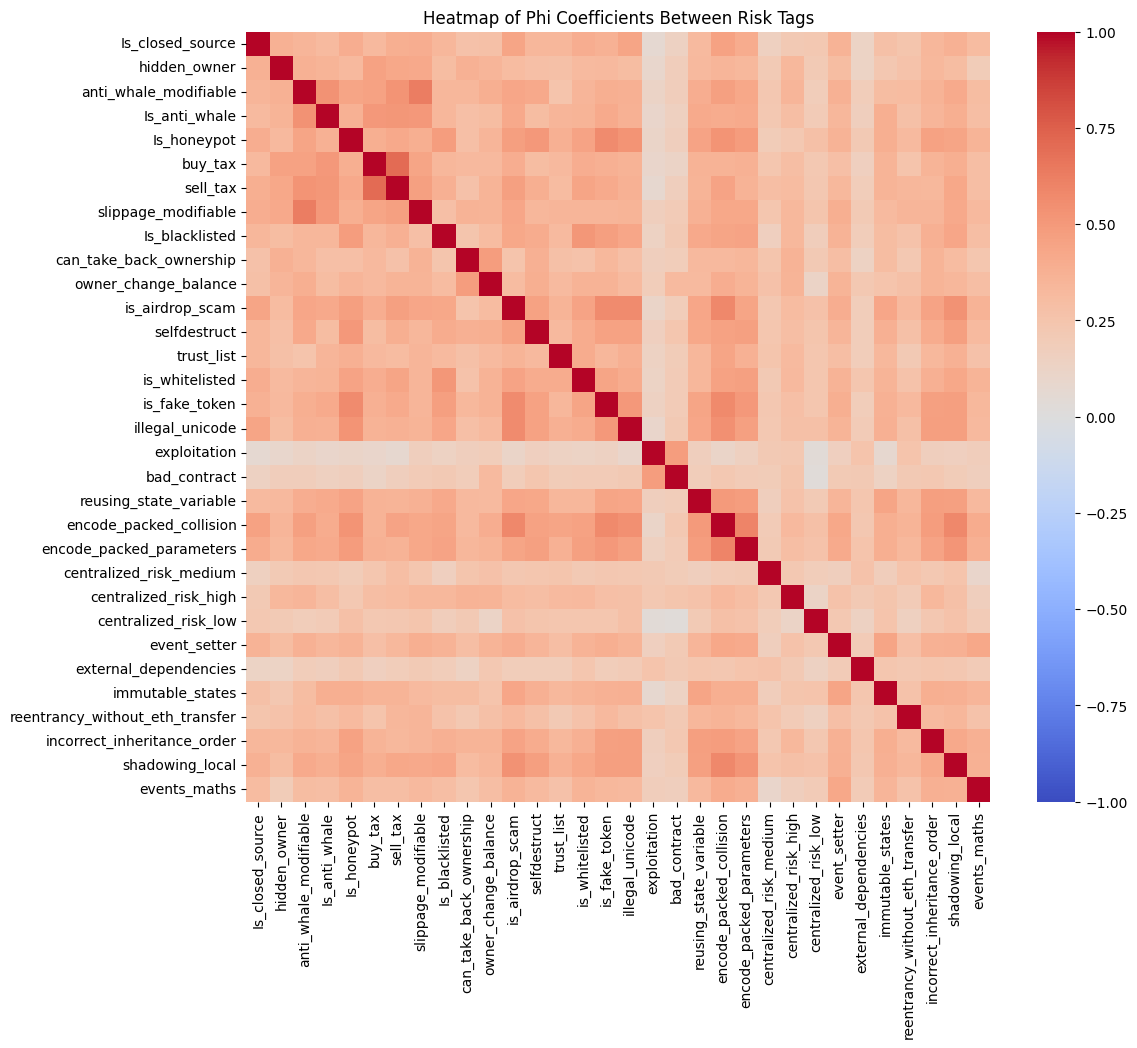

In [7]:
# Setting the size of the plot
plt.figure(figsize=(12, 10))

# Creating a heatmap
sns.heatmap(phi_matrix.astype(float), annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()


You can experiment with a variety of versions of this heatmap to improve visibility of the trends